In [80]:
# Importing all the necessary modules/libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_curve, roc_auc_score, recall_score, f1_score

In [34]:
# 2.1 Data Loading and Initial Exploration

# Loading the data and displaying the first 5 rows

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
# Show the data types of all features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
# Show the number of null values

df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [37]:
# The data type of TotalCharges is String, but it's supposed to be a float
# Converting it to float shows us the true number of missing values (using the 'coerce' keyword)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [38]:
# Summarizing descriptive statistics for numerical features in the dataset

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


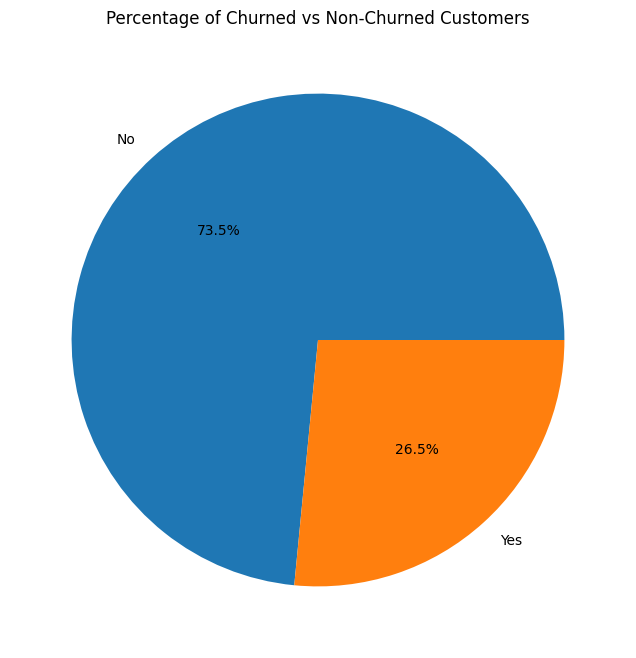

In [39]:
# Pie chart showing the percentages of churned & retained customers

df['Churn'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(8, 8))
plt.title('Percentage of Churned vs Non-Churned Customers')
plt.ylabel('')
plt.show()

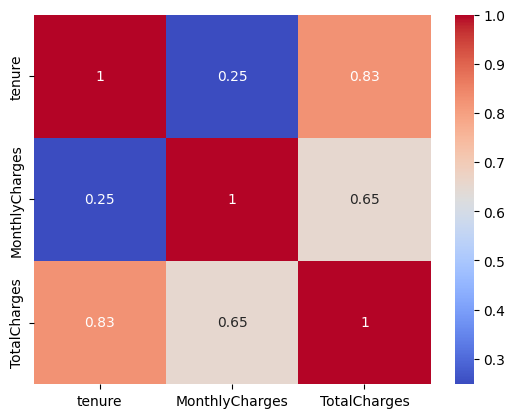

In [40]:
# Heatmap that shows the correlation between numerical features

correlation = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.show()

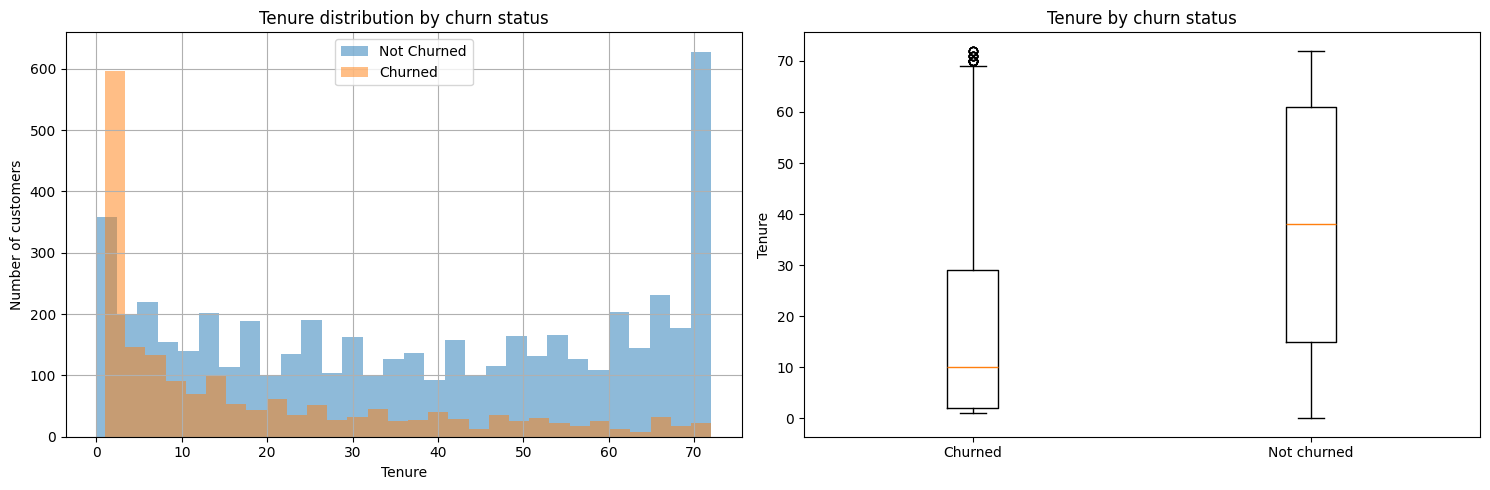

In [41]:
# Histogram & boxplot of tenure distribution with churn

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df[df['Churn'] == 'No']['tenure'].hist(alpha=0.5, label='Not Churned', bins=30, ax=axes[0])
df[df['Churn'] == 'Yes']['tenure'].hist(alpha=0.5, label='Churned', bins=30, ax=axes[0])
axes[0].set_title('Tenure distribution by churn status')
axes[0].set_xlabel('Tenure')
axes[0].set_ylabel('Number of customers')
axes[0].legend()

axes[1].boxplot([
    df[df['Churn']=='Yes']['tenure'], 
    df[df['Churn']=='No']['tenure']
],
tick_labels=['Churned', 'Not churned']
)
axes[1].set_ylabel('Tenure')
axes[1].set_title('Tenure by churn status')
plt.tight_layout()
plt.show()

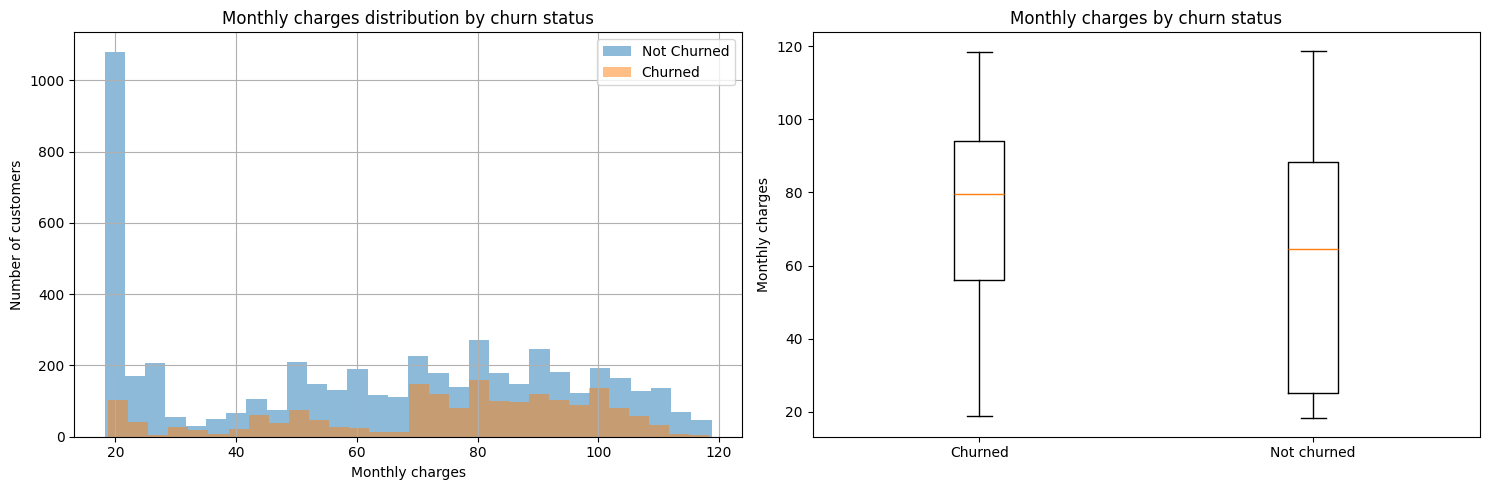

In [42]:
# Histogram & boxplot of monthly charges distribution with churn

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df[df['Churn'] == 'No']['MonthlyCharges'].hist(alpha=0.5, label='Not Churned', bins=30, ax=axes[0])
df[df['Churn'] == 'Yes']['MonthlyCharges'].hist(alpha=0.5, label='Churned', bins=30, ax=axes[0])
axes[0].set_title('Monthly charges distribution by churn status')
axes[0].set_xlabel('Monthly charges')
axes[0].set_ylabel('Number of customers')
axes[0].legend()

axes[1].boxplot([
    df[df['Churn']=='Yes']['MonthlyCharges'], 
    df[df['Churn']=='No']['MonthlyCharges']
],
tick_labels=['Churned', 'Not churned']
)
axes[1].set_ylabel('Monthly charges')
axes[1].set_title('Monthly charges by churn status')
plt.tight_layout()
plt.show()

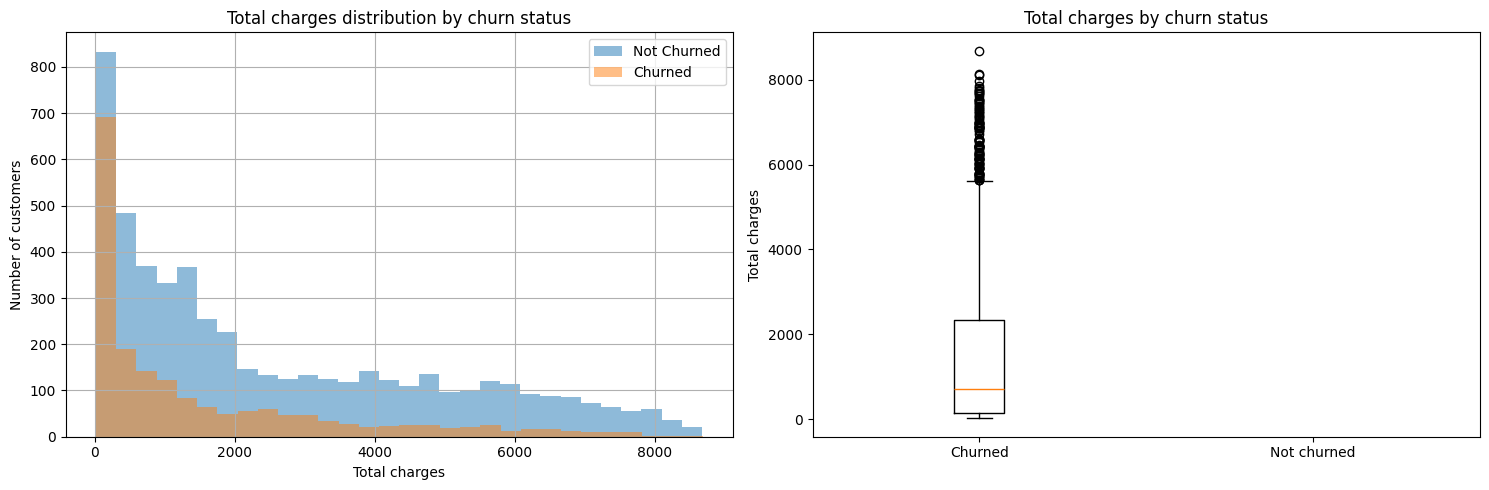

In [43]:
# Histogram & boxplot of total charges distribution with churn

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

df[df['Churn'] == 'No']['TotalCharges'].hist(alpha=0.5, label='Not Churned', bins=30, ax=axes[0])
df[df['Churn'] == 'Yes']['TotalCharges'].hist(alpha=0.5, label='Churned', bins=30, ax=axes[0])
axes[0].set_title('Total charges distribution by churn status')
axes[0].set_xlabel('Total charges')
axes[0].set_ylabel('Number of customers')
axes[0].legend()

#boxplots
axes[1].boxplot([
    df[df['Churn']=='Yes']['TotalCharges'], 
    df[df['Churn']=='No']['TotalCharges']
],
tick_labels=['Churned', 'Not churned']
)
axes[1].set_ylabel('Total charges')
axes[1].set_title('Total charges by churn status')
plt.tight_layout()
plt.show()

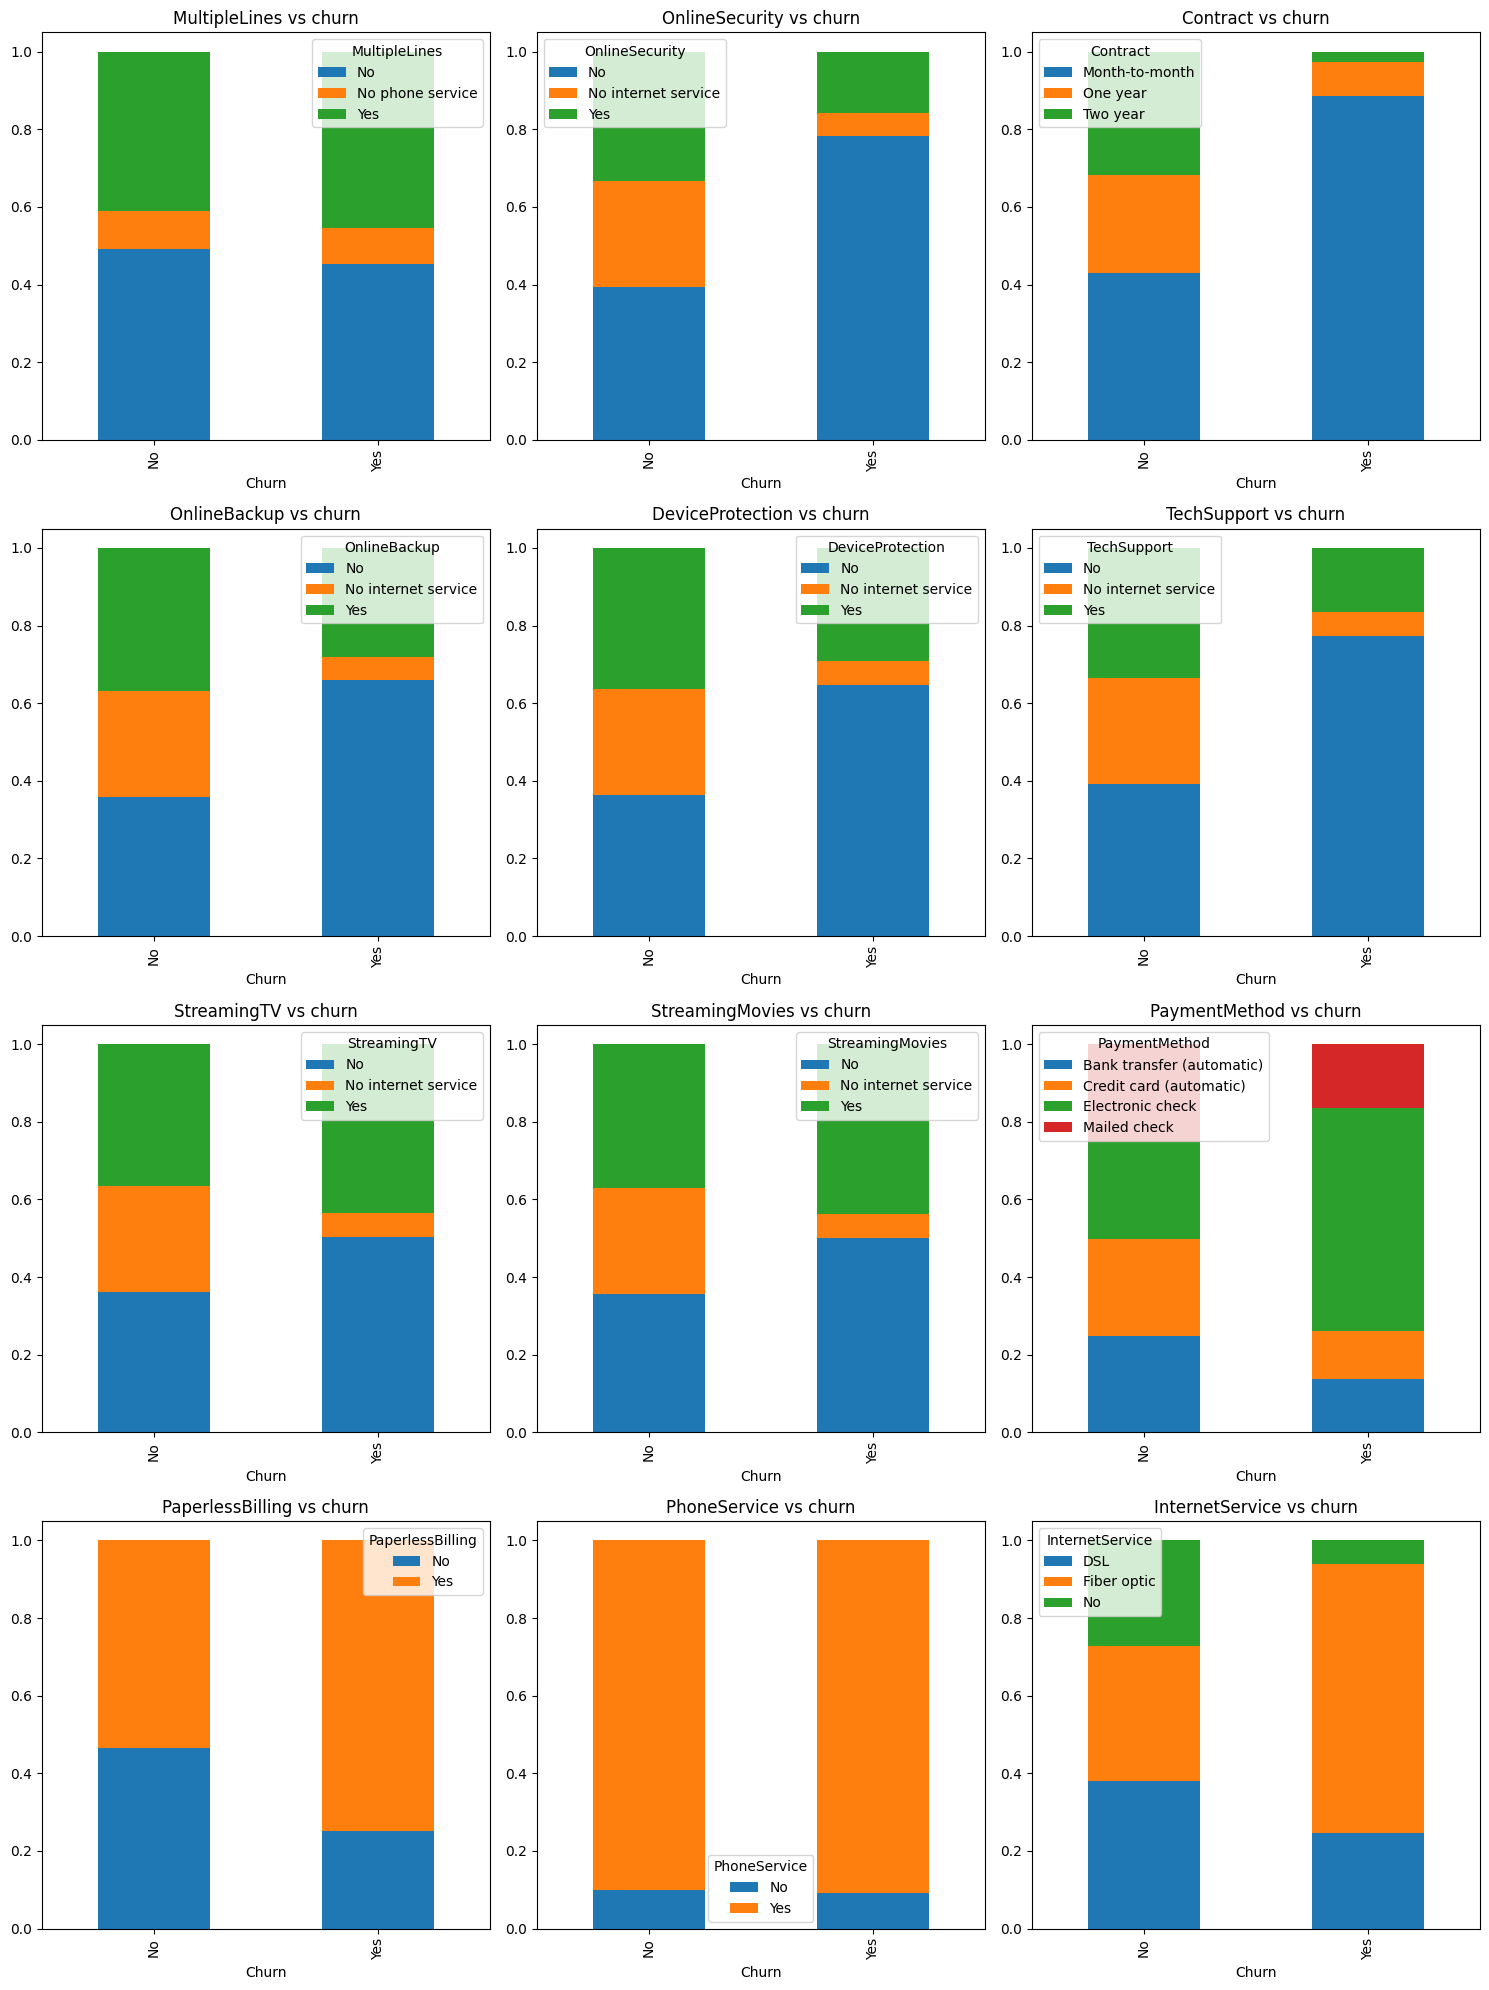

In [44]:
# Stacked bar charts to show the relationships between different categorical features (services) and churn
services = ['MultipleLines', 'OnlineSecurity', 'Contract',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaymentMethod',
                    'PaperlessBilling', 'PhoneService', 'InternetService']

fig, axes = plt.subplots(4, 3, figsize=(15, 20))
for i, service in enumerate(services):
    row, col = i // 3, i % 3
    crosstab = pd.crosstab(df['Churn'], df[service], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=axes[row, col], title=f'{service} vs churn')
plt.tight_layout()
plt.show()

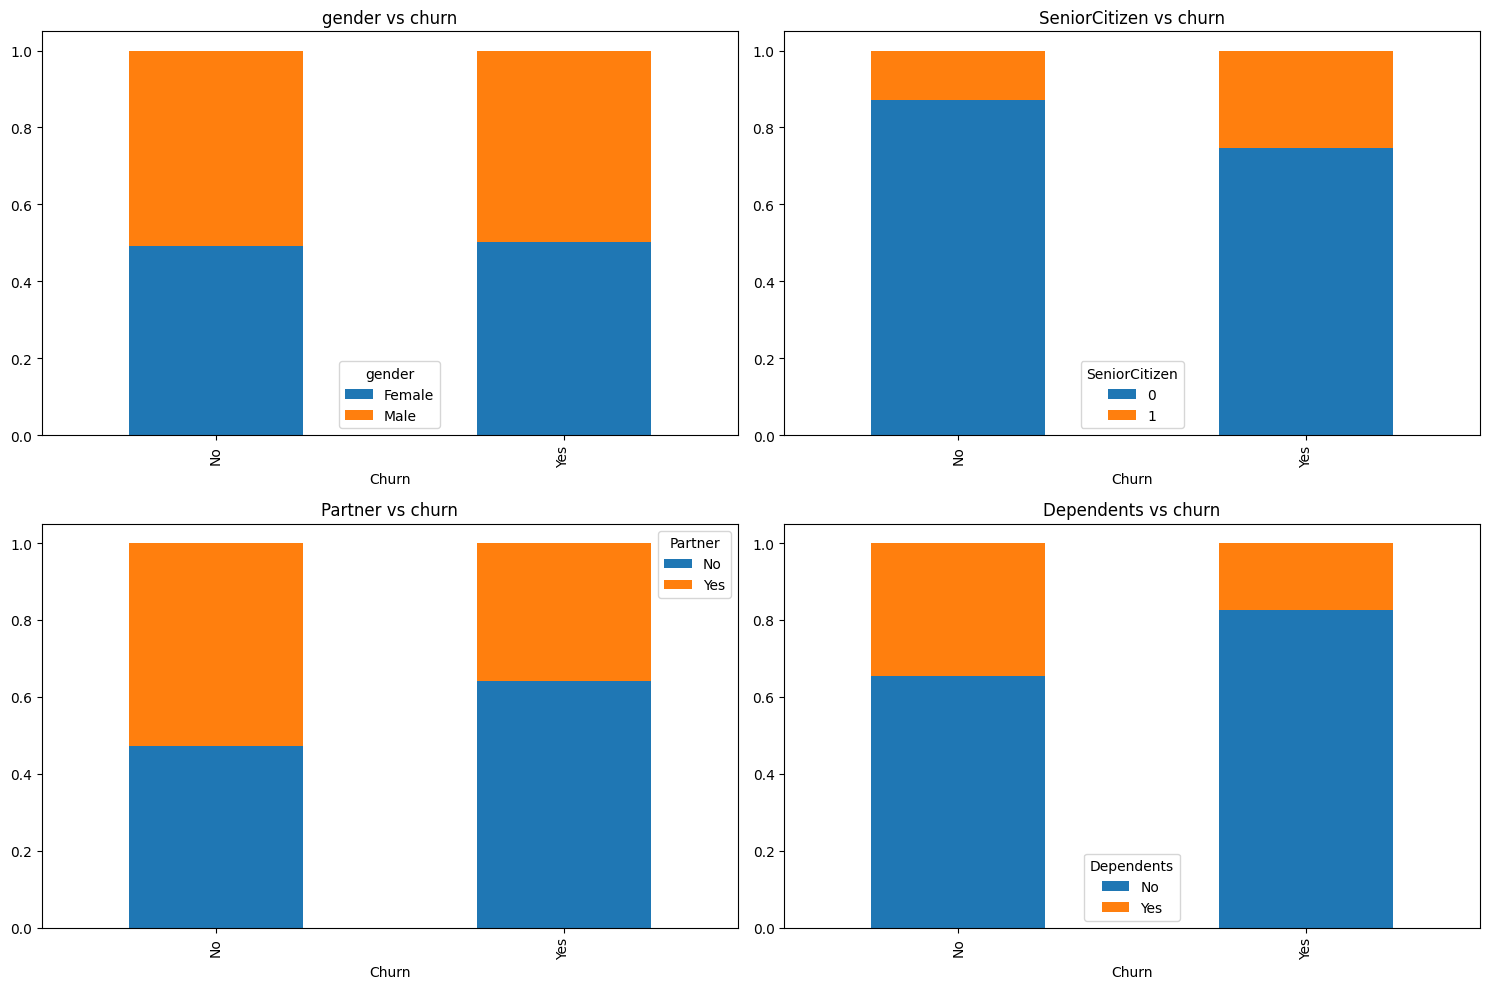

In [45]:
# Stacked bar charts to show the relationships between different categorical features (demographics) and churn

demographics = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for i, demo in enumerate(demographics):
    row, col = i // 2, i % 2
    crosstab = pd.crosstab(df['Churn'], df[demo], normalize = 'index')
    crosstab.plot(kind='bar', stacked= True, ax=axes[row, col], title=f'{demo} vs churn')
plt.tight_layout()
plt.show()

In [46]:
# 2.2 Data Preprocessing and Feature Engineering

# Handling missing values using dropna()
df = df.dropna(subset=['TotalCharges'])

# Checking the number of missing values after dropna()
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

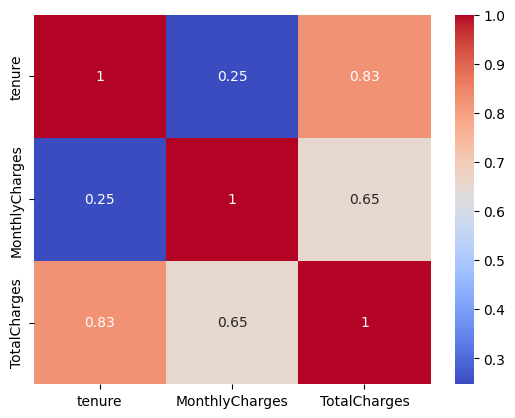

In [47]:
# Redoing the numerical value charts for EDA after removing missing values
# Heatmap
correlation = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation, cmap='coolwarm', annot=True)
plt.show()

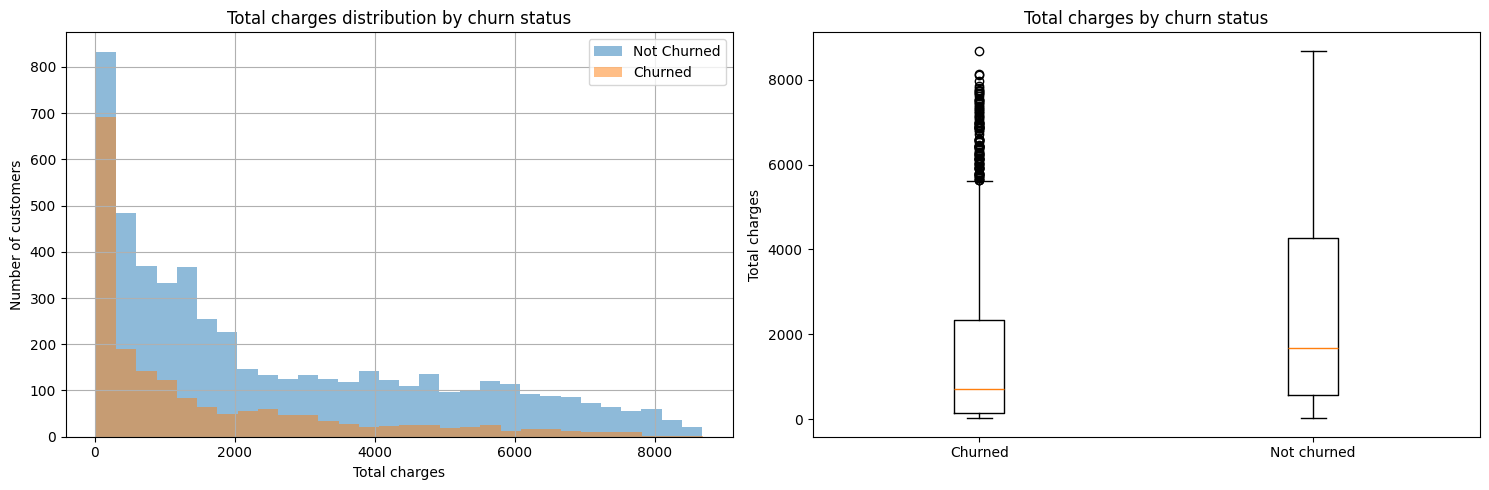

In [48]:
# Total charges vs churn histogram & boxplot AFTER dropna()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Histogram
df[df['Churn'] == 'No']['TotalCharges'].hist(alpha=0.5, label='Not Churned', bins=30, ax=axes[0])
df[df['Churn'] == 'Yes']['TotalCharges'].hist(alpha=0.5, label='Churned', bins=30, ax=axes[0])
axes[0].set_title('Total charges distribution by churn status')
axes[0].set_xlabel('Total charges')
axes[0].set_ylabel('Number of customers')
axes[0].legend()

# Boxplots
axes[1].boxplot([
    df[df['Churn']=='Yes']['TotalCharges'], 
    df[df['Churn']=='No']['TotalCharges']
],
tick_labels=['Churned', 'Not churned']
)
axes[1].set_ylabel('Total charges')
axes[1].set_title('Total charges by churn status')
plt.tight_layout()
plt.show()

In [49]:
# Convert categorical features into numerical representations 

# Delete customerID column as it is not useful for prediction
df = df.drop('customerID', axis=1)

# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

binary_cols = []
multi_category_cols = []

for col in cat_cols:
    unique_count = df[col].nunique()
    unique_values = df[col].unique()
    
    if unique_count == 2:
        binary_cols.append(col)
    else:
        multi_category_cols.append(col)

# Create the encoded dataset
df_encoded = df.copy()

# Apply label encoding to binary columns
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Apply one-hot encoding to multi-category columns
df_encoded = pd.get_dummies(
    df_encoded, 
    columns=multi_category_cols,
    drop_first=True, 
    prefix=multi_category_cols,
    dtype=int
)

df_encoded.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,0,0,0,0,0,1,0


In [50]:
# Values mapping table for categorical features
mapping_tables = []

# For binary columns (label encoded)
for col in binary_cols:
    le = LabelEncoder()
    le.fit(df[col])
    
    mapping_df = pd.DataFrame({
        "Column": col,
        "Encoding Type": "Label Encoding",
        "Original Value": le.classes_,
        "Encoded Value": range(len(le.classes_))
    })
    
    mapping_tables.append(mapping_df)

# For multi-category columns (one-hot encoded)
for col in multi_category_cols:
    original_values = df[col].unique()
    # Get the actual one-hot encoded column names that were created
    encoded_columns = [c for c in df_encoded.columns if c.startswith(f"{col}_")]
    
    # Create mapping for each one-hot encoded column
    for encoded_col in encoded_columns:
        original_val = encoded_col.replace(f"{col}_", "")
        mapping_df = pd.DataFrame({
            "Column": encoded_col,
            "Encoding Type": "One-Hot Encoding", 
            "Original Value": [original_val],
            "Encoded Value": [1]  # One-hot encoding uses 1 for presence
        })
        mapping_tables.append(mapping_df)
    
    # Also show the base category that was dropped (due to drop_first=True)
    base_category = original_values[0]  # The first category was dropped
    mapping_df = pd.DataFrame({
        "Column": f"{col}",
        "Encoding Type": "One-Hot Encoding (Dropped)",
        "Original Value": [base_category],
        "Encoded Value": [0]  # Reference category encoded as 0 in all dummy vars
    })
    mapping_tables.append(mapping_df)

# Combine all into one table
final_mapping_table = pd.concat(mapping_tables, ignore_index=True)

# Display the table
final_mapping_table

,Column,Encoding Type,Original Value,Encoded Value
0,gender,Label Encoding,Female,0
1,gender,Label Encoding,Male,1
2,Partner,Label Encoding,No,0
3,Partner,Label Encoding,Yes,1
4,Dependents,Label Encoding,No,0
5,Dependents,Label Encoding,Yes,1
6,PhoneService,Label Encoding,No,0
7,PhoneService,Label Encoding,Yes,1
8,PaperlessBilling,Label Encoding,No,0
9,PaperlessBilling,Label Encoding,Yes,1


In [51]:
# Scaling

# Select continuous numeric columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Create final_df as a copy
final_df = df_encoded.copy()

# Scale only continuous features
scaler = StandardScaler()
final_df[num_cols] = scaler.fit_transform(final_df[num_cols])

final_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,0,0,0,0,0,1,0,0,0,1
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,0,0,0,0,0,0,0,0,1,0


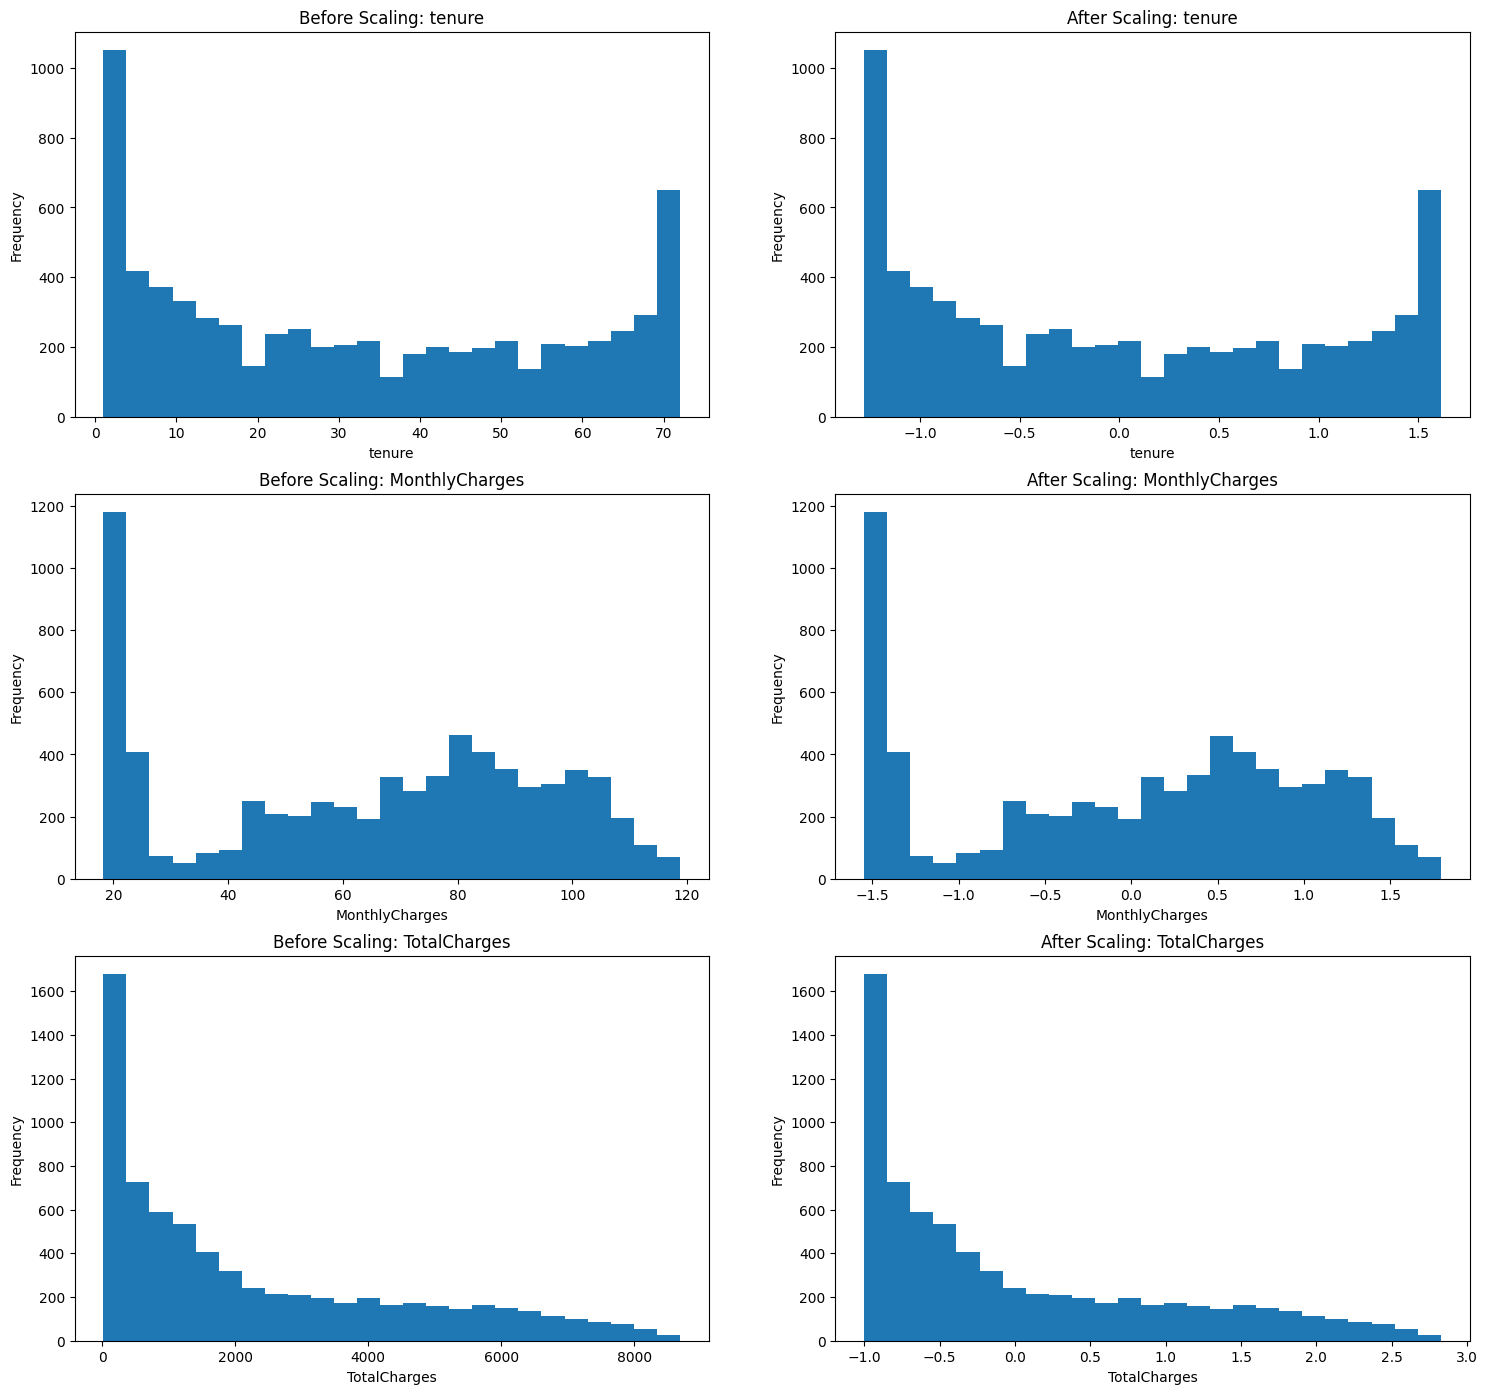

In [52]:
# Before vs After Scaling 
plt.figure(figsize=(18, 17))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 2, 2*i - 1)
    plt.hist(df[col].dropna(), bins=25)
    plt.title(f"Before Scaling: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    plt.subplot(len(num_cols), 2, 2*i)
    plt.hist(final_df[col].dropna(), bins=25)
    plt.title(f"After Scaling: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.show()

In [53]:
# Split the dataset into training and testing sets 

# Features and Target
X = final_df.drop("Churn", axis=1)
y = final_df["Churn"]

# Train–test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Convert to numpy arrays for model training
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_cols] = scaler.transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4922, 30), (2110, 30), (4922,), (2110,))

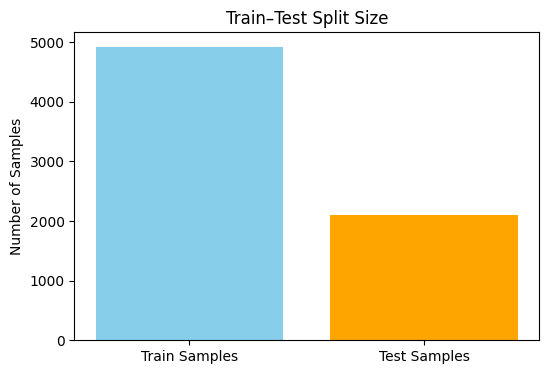

In [54]:
# Visualizing the train-test split sizes
plt.figure(figsize=(6,4))
plt.bar(["Train Samples", "Test Samples"], [len(X_train), len(X_test)], color=["skyblue", "orange"])
plt.title("Train–Test Split Size")
plt.ylabel("Number of Samples")
plt.show()

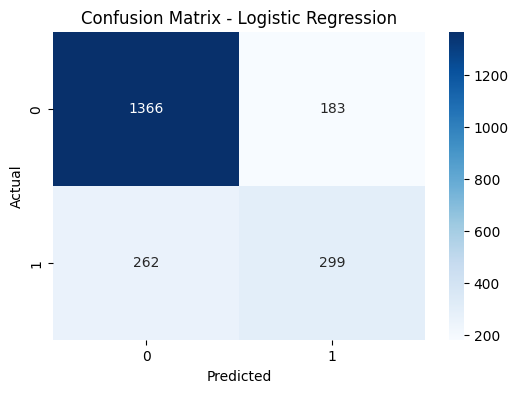

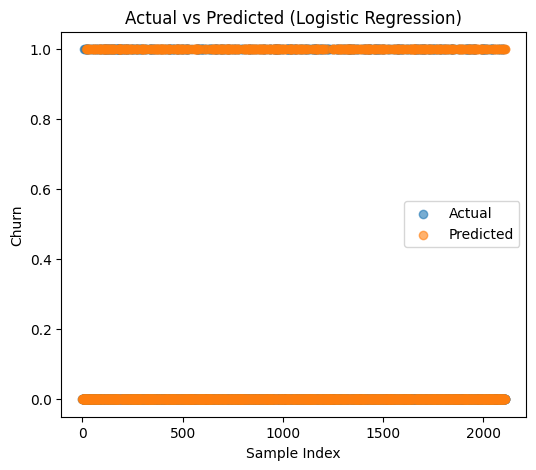

In [55]:
# 2.3 Model Building and Training

# Logistic Regression Classifier Model
log_model = LogisticRegression(max_iter=1000)

# Train the model
log_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_model.predict(X_test_scaled)

# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Scatter Plot 
plt.figure(figsize=(6,5))
plt.scatter(range(len(y_test)), y_test, label="Actual", alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label="Predicted", alpha=0.6)
plt.legend()
plt.title("Actual vs Predicted (Logistic Regression)")
plt.xlabel("Sample Index")
plt.ylabel("Churn")
plt.show()

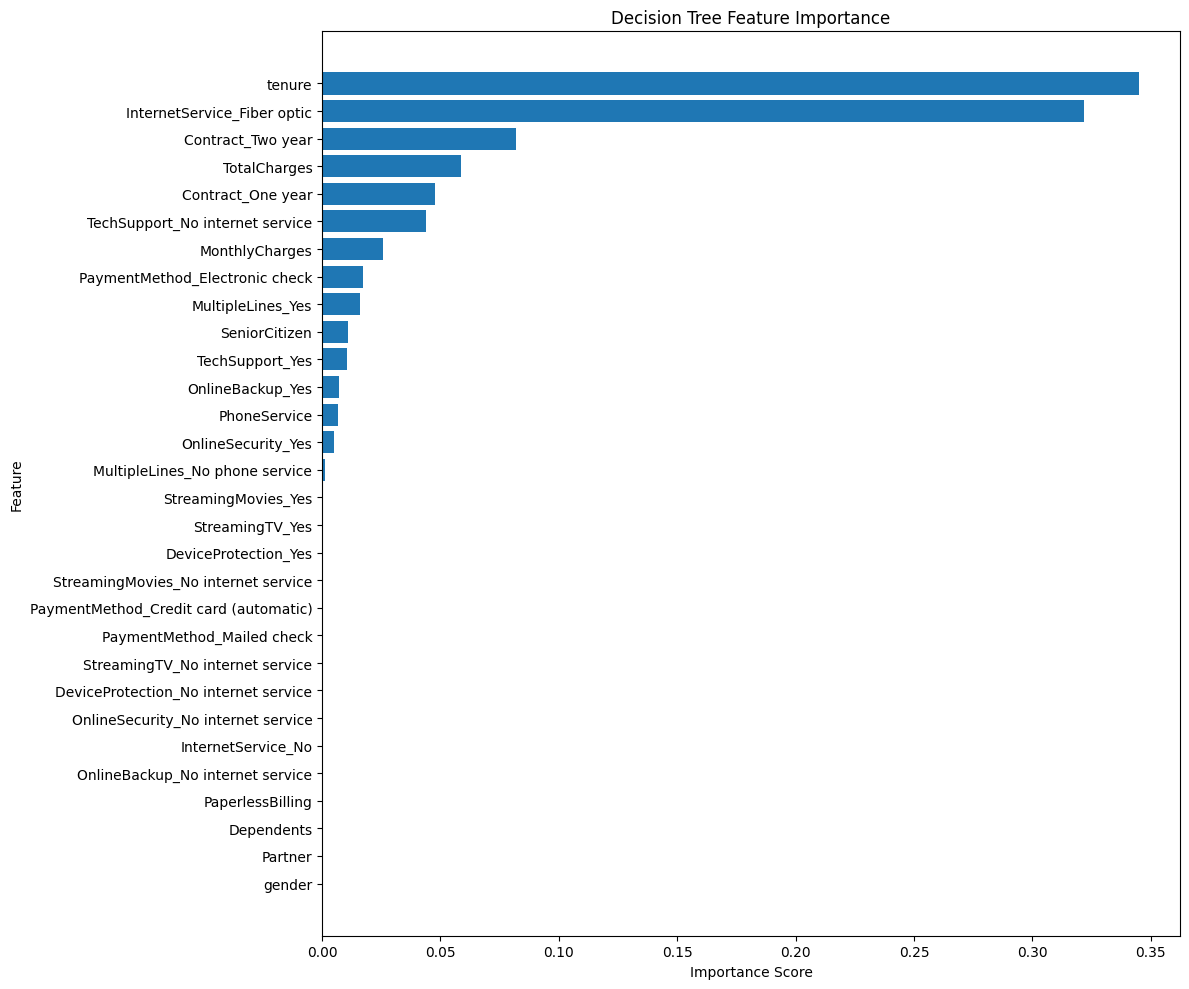

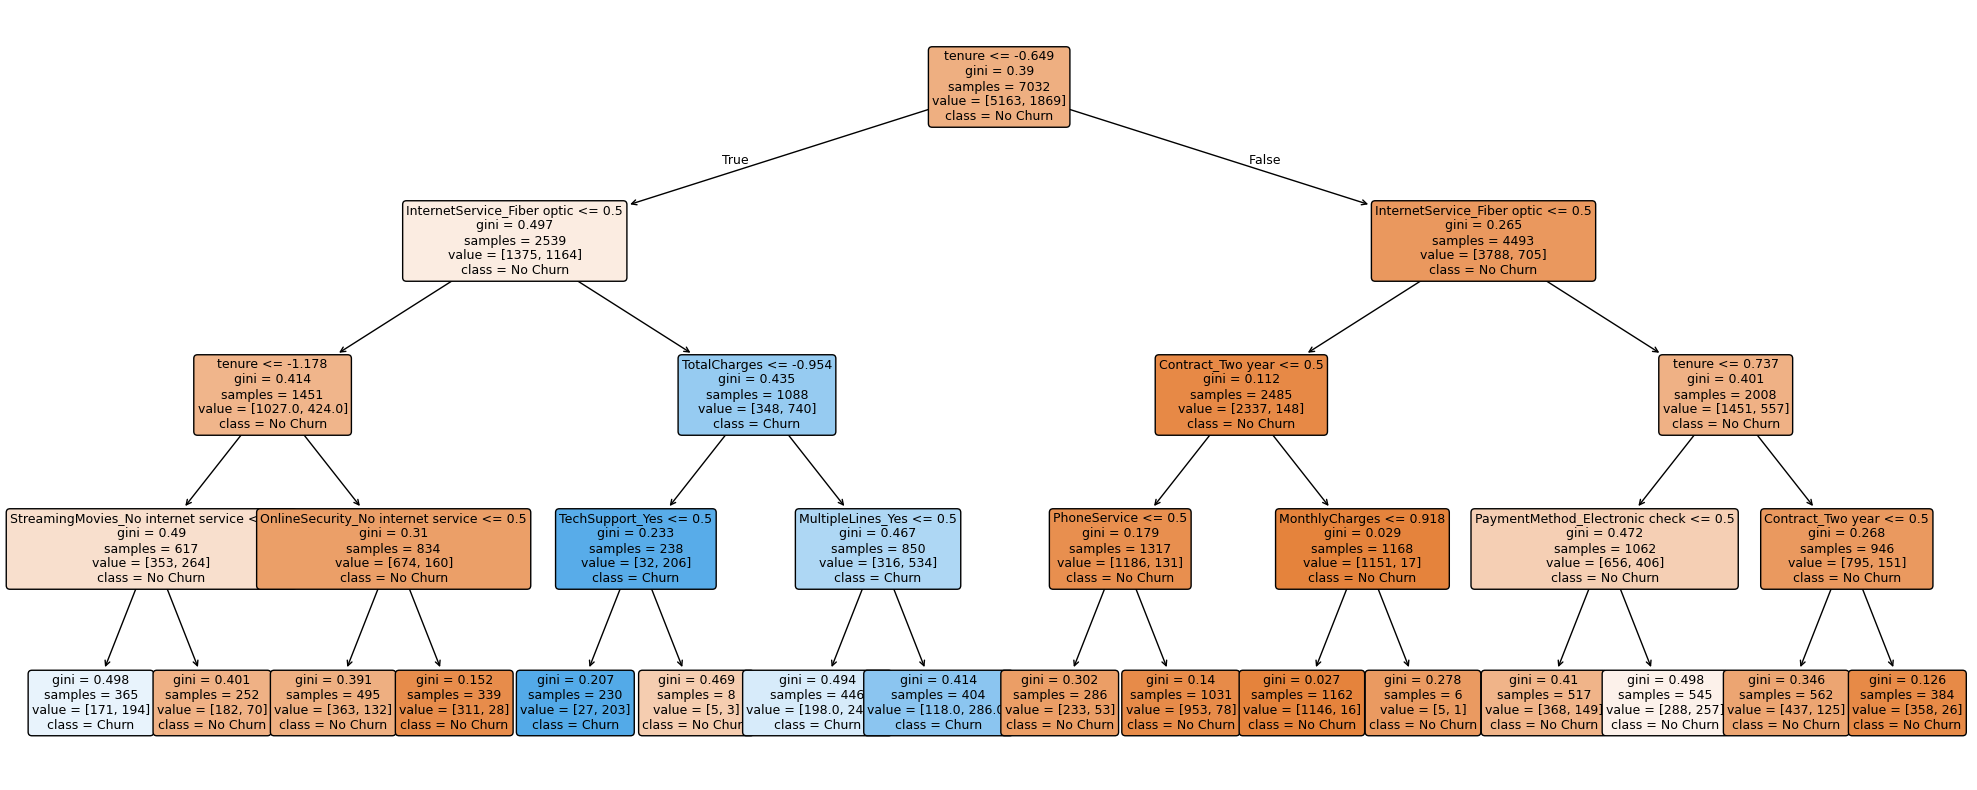

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
# Decision Tree Classifier Model

dt_model = DecisionTreeClassifier(
    max_depth=5,
    random_state=42
)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test_scaled)

# Decision Tree Feature Importance Plot
# Extract feature importances
importances = dt_model.feature_importances_
# original feature names
feature_names = X.columns  

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 10))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.gca().invert_yaxis()  # most important at the top
plt.title("Decision Tree Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Decision Tree Visualization Function
def decision_tree(df, target_col):
    
    # Prepare features (all columns except target)
    feature_cols = [col for col in df.columns if col != target_col]
    
    X = df[feature_cols]
    y = df[target_col]
    
    # Handle categorical data
    cat_cols = X.select_dtypes(include=['object']).columns
    
    for col in cat_cols:
        X[col] = LabelEncoder().fit_transform(X[col].astype(str))
    
    if y.dtype == 'object':
        y = LabelEncoder().fit_transform(y)
    
    # Build tree
    model = DecisionTreeClassifier(max_depth=4, random_state=42)
    model.fit(X, y)
    
    # Plot
    plt.figure(figsize=(25, 10))
    plot_tree(model, feature_names=feature_cols, class_names=["No Churn", "Churn"], filled=True, rounded=True, fontsize=9)
    plt.show()
    
    return model

decision_tree(final_df, 'Churn')


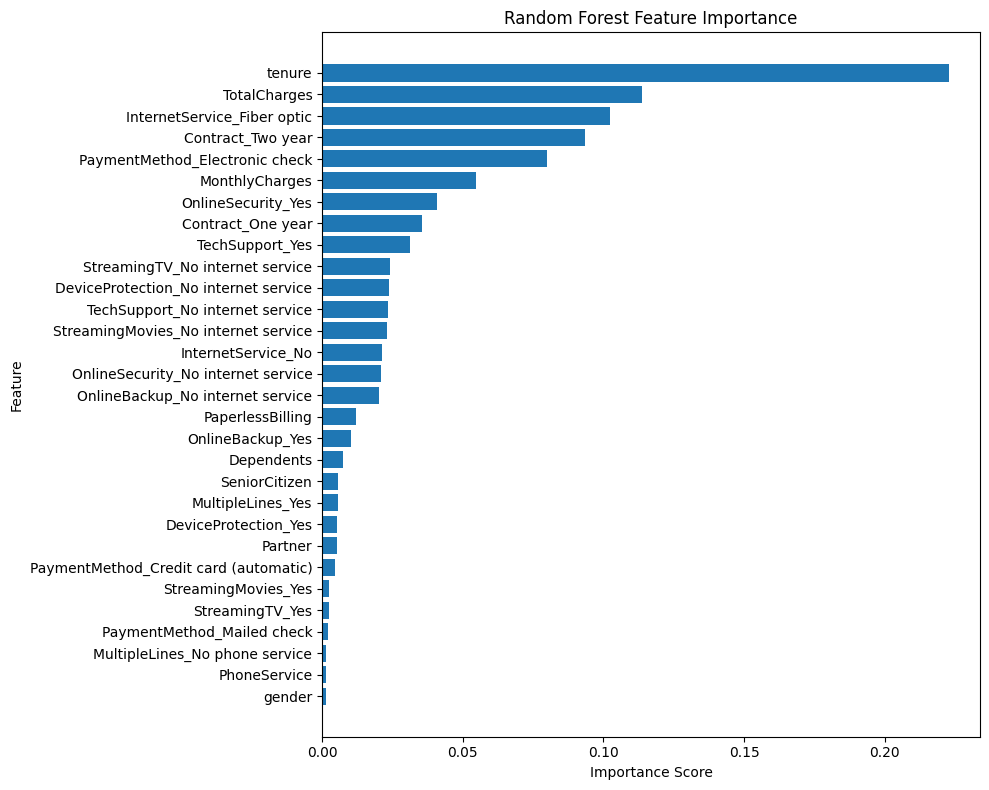

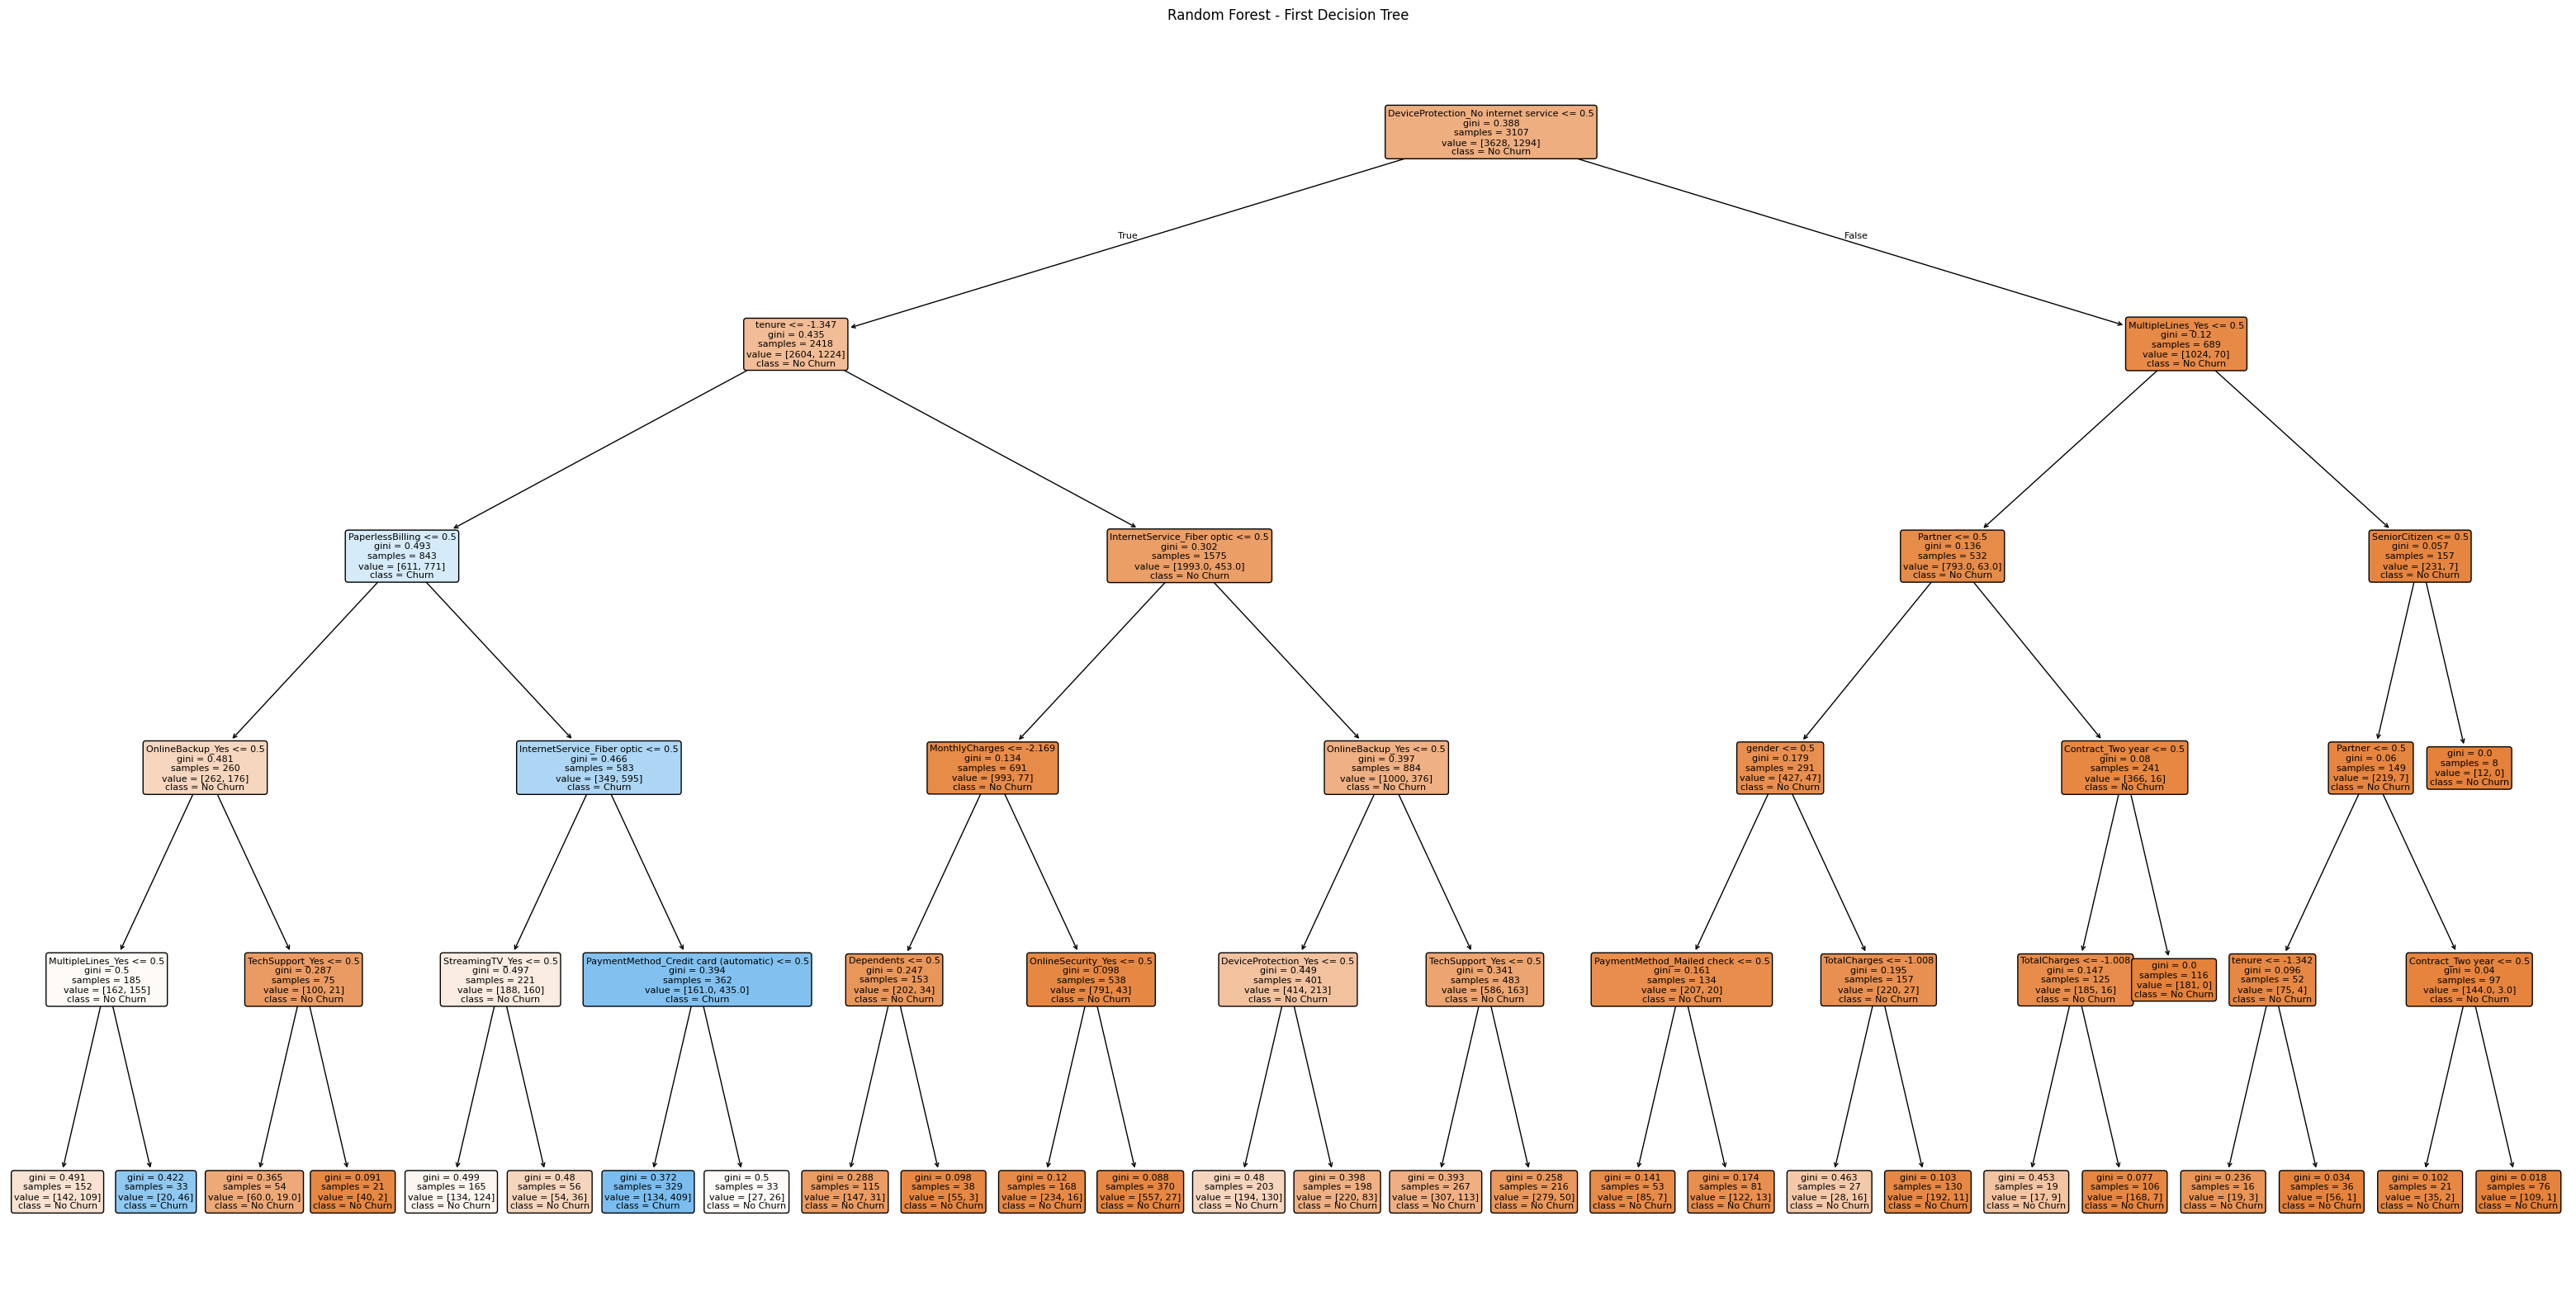

In [57]:
# Random Forest Classifier Model

rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test_scaled)

# Random Forest Feature Importance Plot
# Extract feature importances from *random forest* (correct)
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort by importance
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.gca().invert_yaxis()  # most important at the top
plt.title("Random Forest Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Visualizing One Decision Tree from the Random Forest
# Select the first tree in the forest
estimator = rf_model.estimators_[0]

# Plot the tree 
plt.figure(figsize=(40, 20))
plot_tree(
    estimator,
    feature_names=X_train.columns,     # original feature names
    class_names=["No Churn", "Churn"],     
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Random Forest - First Decision Tree")
plt.show()

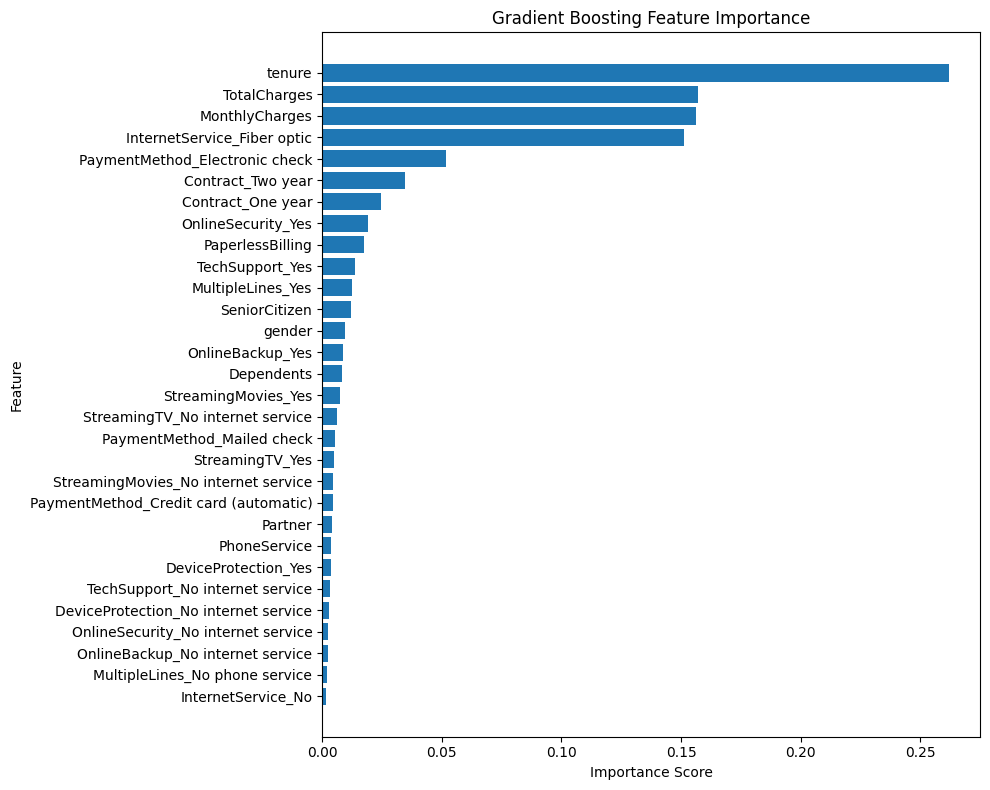

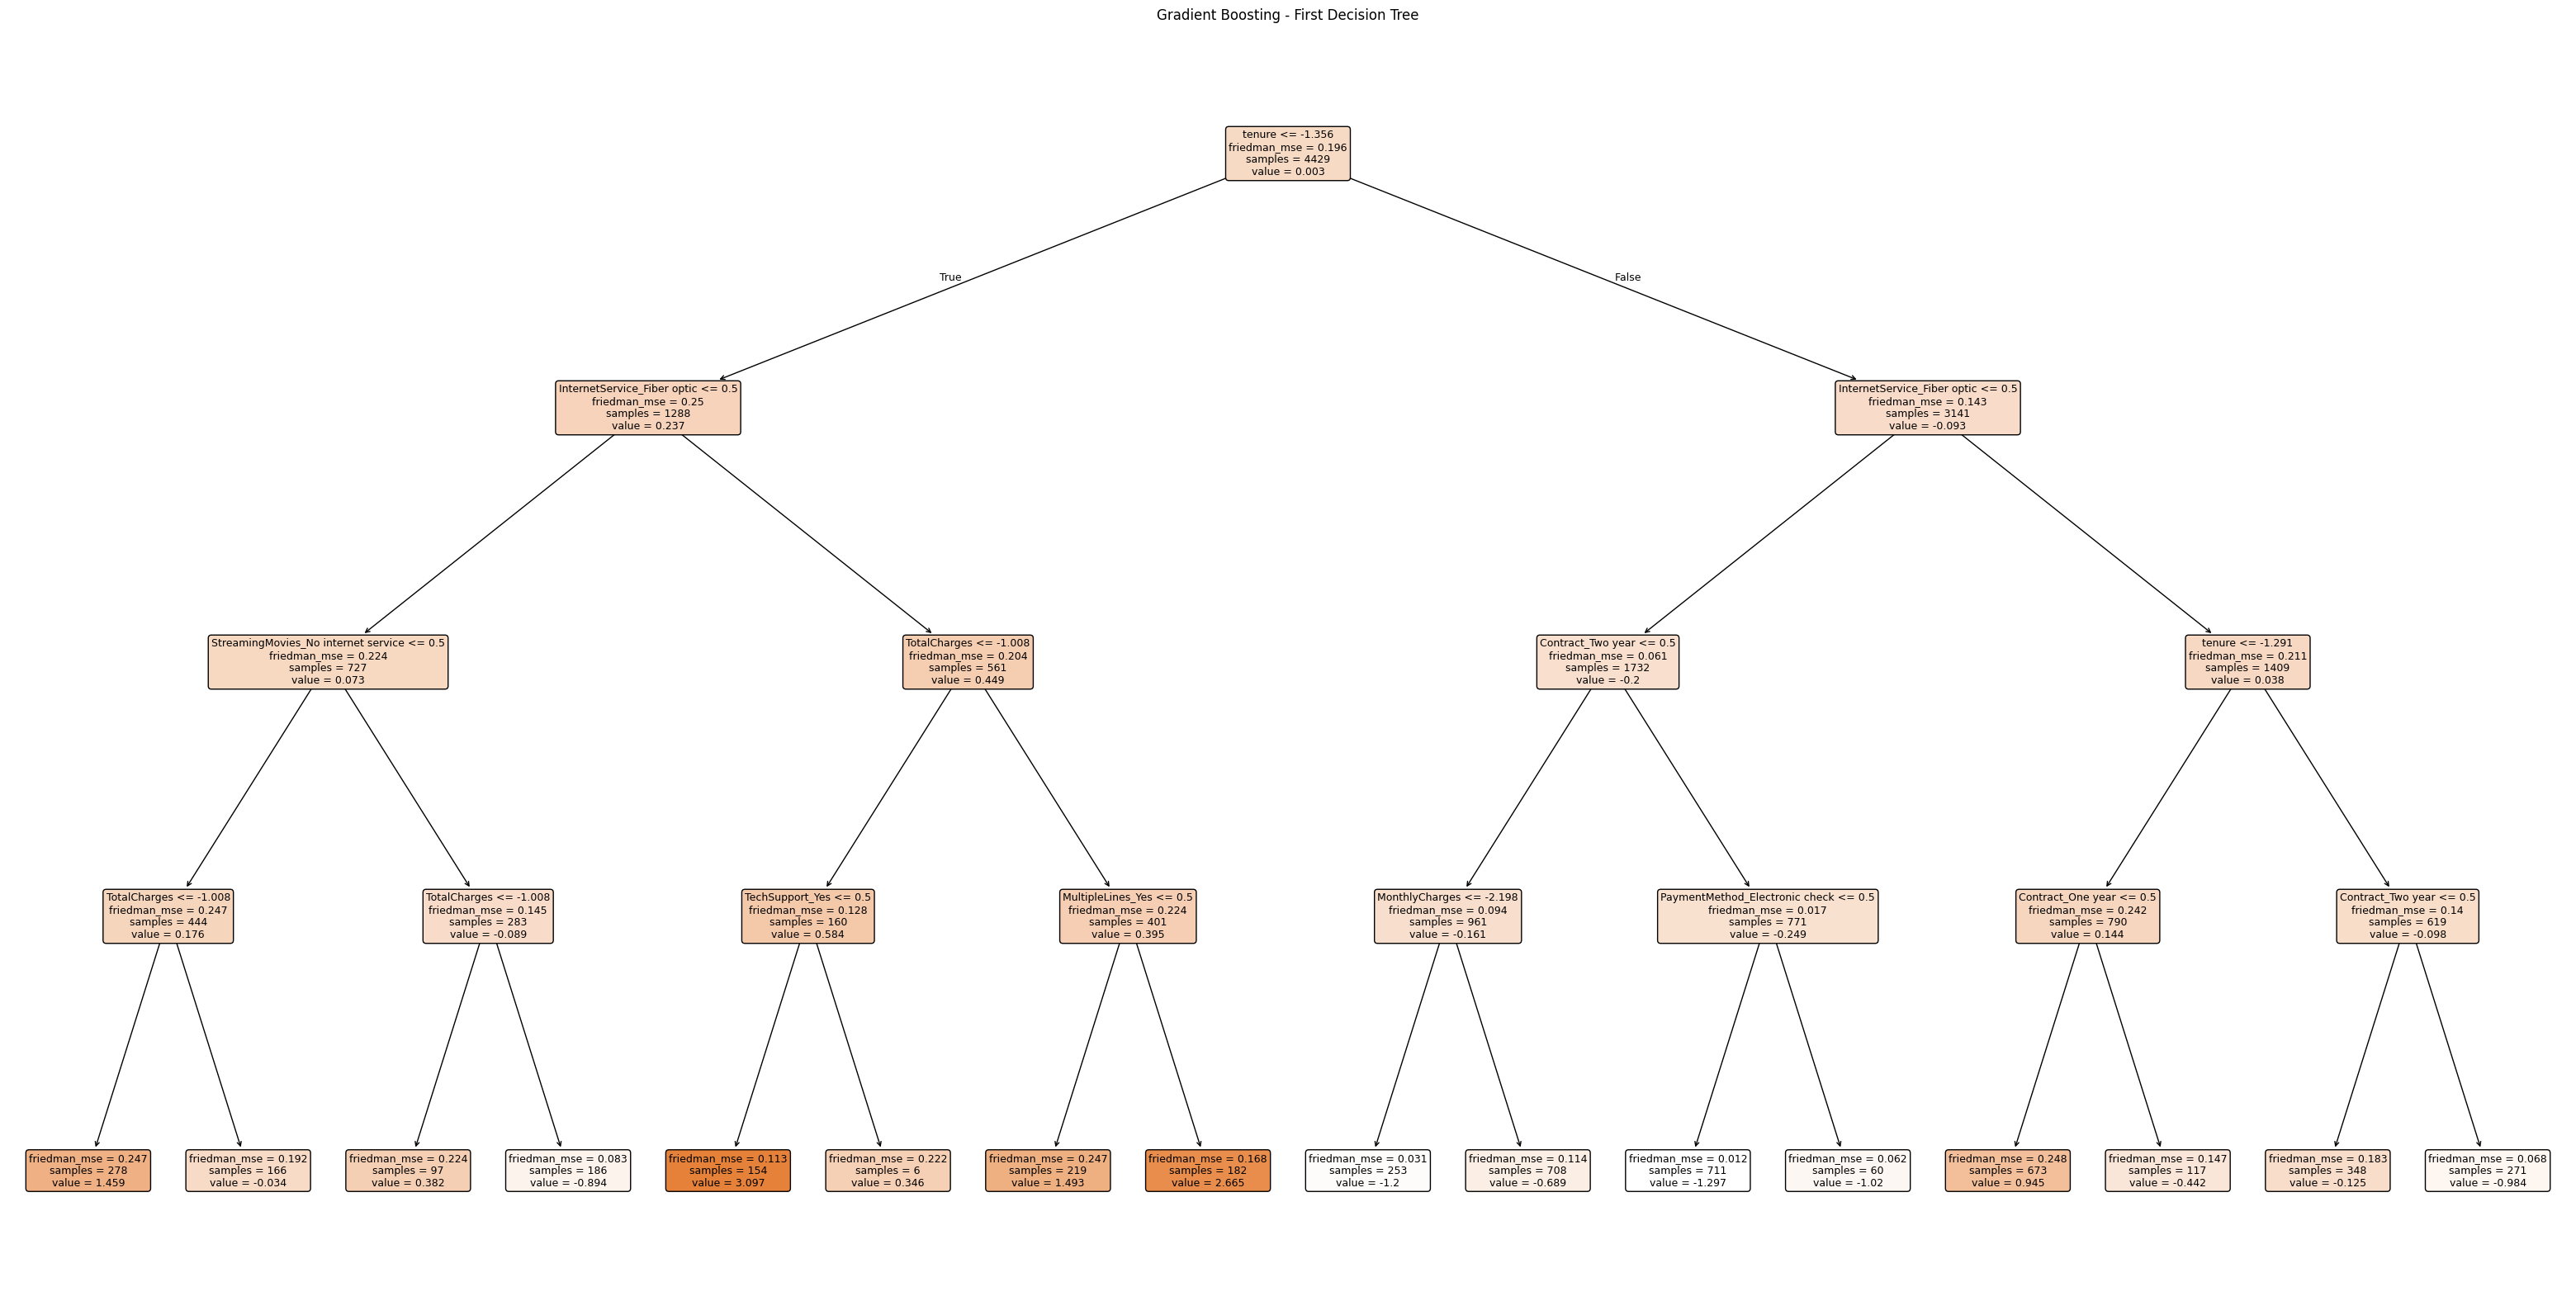

In [58]:
# Gradient Boosting Classifier Model

gb_model = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=400,
    max_depth=4,
    subsample=0.9,
    min_samples_split=3,
    min_samples_leaf=2,
    random_state=42
)

# Train the model
gb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test_scaled)

# Gradient Boosting Feature Importance Plot
# Extract feature importances
gb_importances = gb_model.feature_importances_
feature_names = X.columns  # original feature names

# Sort by importance (largest → smallest)
indices = np.argsort(gb_importances)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), gb_importances[indices], align='center')
plt.yticks(range(len(indices)), feature_names[indices])
plt.gca().invert_yaxis()  # important features at top
plt.title("Gradient Boosting Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# Visualizing One Decision Tree from Gradient Boosting
# Select the first tree from the model
# Gradient Boosting stores trees in gb.estimators_[stage][class]
tree = gb_model.estimators_[0][0] # Gradient Boosting stores trees in gb.estimators_[stage][class], (stage 0, class 0 (binary classification))

# Plot the tree
plt.figure(figsize=(40, 20))
plot_tree(
    tree,
    feature_names=X_train.columns,
    class_names=["No Churn", "Churn"],
    filled=True,
    rounded=True,
    fontsize=9
)
plt.title("Gradient Boosting - First Decision Tree")
plt.show()


Fitting 3 folds for each of 192 candidates, totalling 576 fits


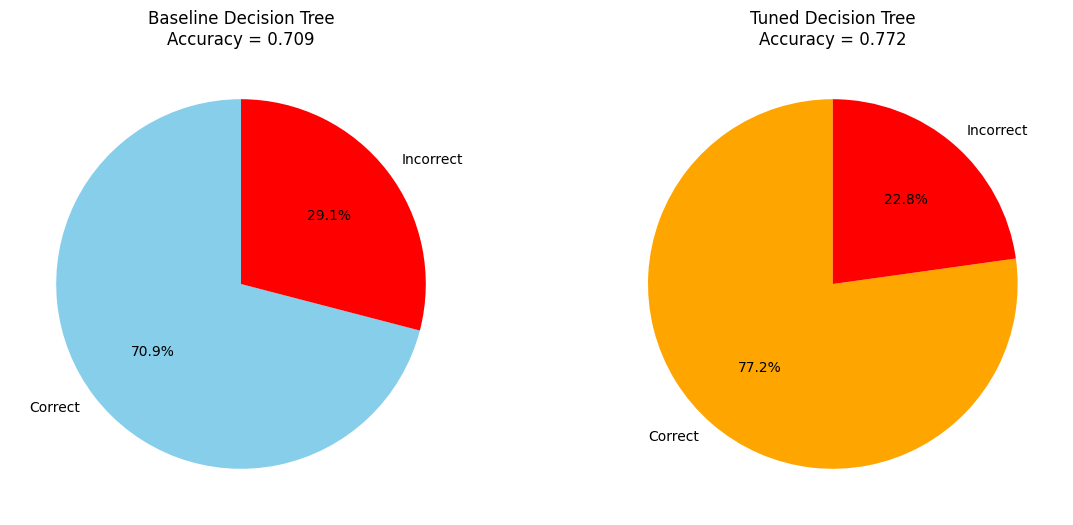

In [59]:
# Hyperparameter Tuning  with GridSearchCV for Decision Tree

# Baseline Decision Tree
baseline_dt = DecisionTreeClassifier(random_state=42)
baseline_dt.fit(X_train_scaled, y_train)
baseline_pred = baseline_dt.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

# GridSearchCV Tuning
param_grid = {
    'max_depth': [3, 4, 5, 8, 12, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'criterion': ['gini', 'entropy']
}

grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_dt.fit(X_train_scaled, y_train)

# Best model
best_dt = grid_search_dt.best_estimator_

# Tuned model
tuned_pred = best_dt.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, tuned_pred)

# Pie Chart Comparasion
# Compute correct / incorrect counts
baseline_correct = (baseline_pred == y_test).sum()
baseline_incorrect = (baseline_pred != y_test).sum()

tuned_correct = (tuned_pred == y_test).sum()
tuned_incorrect = (tuned_pred != y_test).sum()

# Plot side-by-side pies
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Baseline Pie 
axes[0].pie(
    [baseline_correct, baseline_incorrect],
    labels=["Correct", "Incorrect"],
    autopct="%1.1f%%",
    colors=["skyblue", "red"],
    startangle=90,
)
axes[0].set_title(f"Baseline Decision Tree\nAccuracy = {baseline_accuracy:.3f}")

# Tuned Pie 
axes[1].pie(
    [tuned_correct, tuned_incorrect],
    labels=["Correct", "Incorrect"],
    autopct="%1.1f%%",
    colors=["orange", "red"],
    startangle=90,
)
axes[1].set_title(f"Tuned Decision Tree\nAccuracy = {tuned_accuracy:.3f}")

plt.show()

Fitting 3 folds for each of 72 candidates, totalling 216 fits


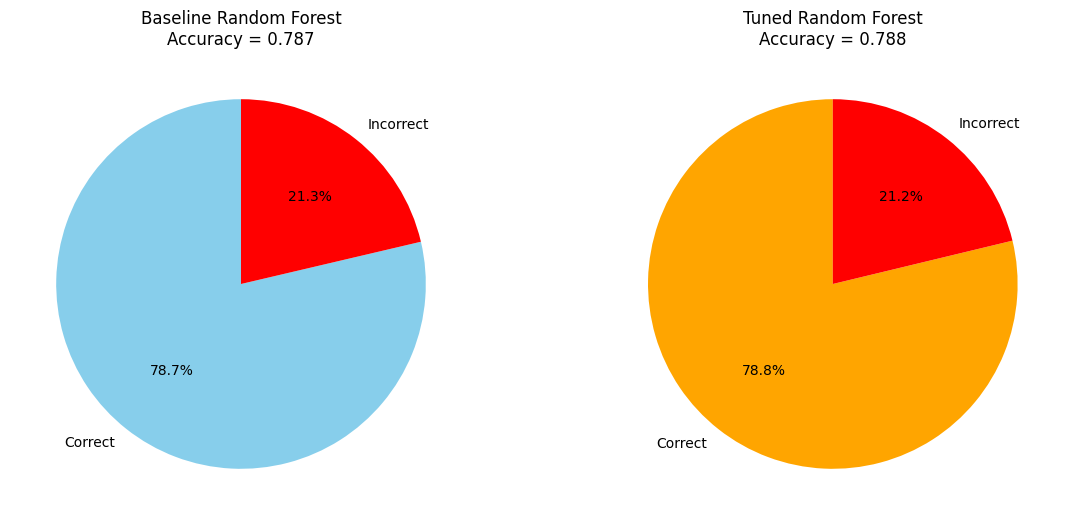

In [60]:
# Hyperparameter Tuning with GridSearchCV for Random Forest

# Baseline Random Forest
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train_scaled, y_train)
baseline_pred = baseline_rf.predict(X_test_scaled)
baseline_accuracy = accuracy_score(y_test, baseline_pred)

# GridSearchCV Hyperparameter Tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 8, 12, None],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)

# Best model
best_rf = grid_search.best_estimator_

# Tuned Model
tuned_pred = best_rf.predict(X_test_scaled)
tuned_accuracy = accuracy_score(y_test, tuned_pred)

# Pie Chart Comparison 
# Compute correct / incorrect counts
baseline_correct = (baseline_pred == y_test).sum()
baseline_incorrect = (baseline_pred != y_test).sum()

tuned_correct = (tuned_pred == y_test).sum()
tuned_incorrect = (tuned_pred != y_test).sum()

# Plot side-by-side pies
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Baseline Pie
axes[0].pie(
    [baseline_correct, baseline_incorrect],
    labels=["Correct", "Incorrect"],
    autopct="%1.1f%%",
    colors=["skyblue", "red"],
    startangle=90,
)
axes[0].set_title(f"Baseline Random Forest\nAccuracy = {baseline_accuracy:.3f}")

# Tuned Pie 
axes[1].pie(
    [tuned_correct, tuned_incorrect],
    labels=["Correct", "Incorrect"],
    autopct="%1.1f%%",
    colors=["orange", "red"],
    startangle=90,
)
axes[1].set_title(f"Tuned Random Forest\nAccuracy = {tuned_accuracy:.3f}")

plt.show()

In [74]:
# Model Evaluation Function
def evaluate_model(model, X_test, y_test, model_name="Model"):
    # Predictions
    y_pred = model.predict(X_test)
    # Probability for ROC-AUC
    y_proba = model.predict_proba(X_test)[:, 1]
 
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
 
    print(f"Evaluation for {model_name}")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("ROC-AUC:", roc_auc)
    print("-" * 50)
 
    
    #  Plot Confusion Matrix
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
 
    return {
        "model": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "confusion_matrix": cm,
        "y_proba": y_proba
    }

Evaluation for Logistic Regression
Accuracy: 0.7890995260663507
Precision: 0.6203319502074689
Recall: 0.5329768270944741
F1-Score: 0.573346116970278
ROC-AUC: 0.8271836582511402
--------------------------------------------------


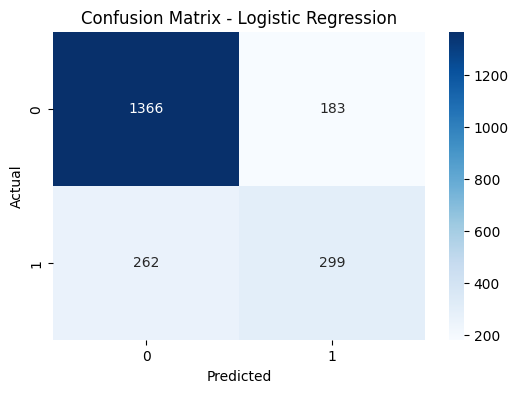

Evaluation for Decision Tree
Accuracy: 0.7720379146919432
Precision: 0.5709219858156028
Recall: 0.5739750445632799
F1-Score: 0.5724444444444444
ROC-AUC: 0.8138842954283656
--------------------------------------------------


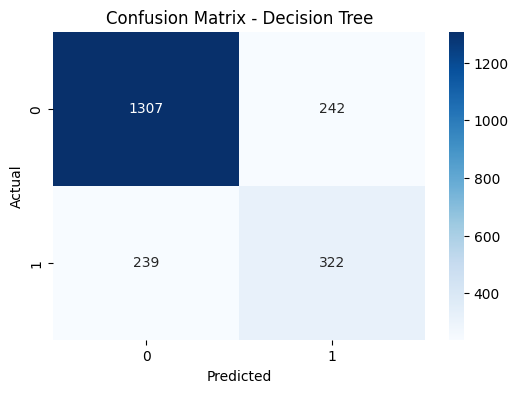

Evaluation for Random Forest
Accuracy: 0.7876777251184834
Precision: 0.66189111747851
Recall: 0.4117647058823529
F1-Score: 0.5076923076923077
ROC-AUC: 0.8340905350930795
--------------------------------------------------


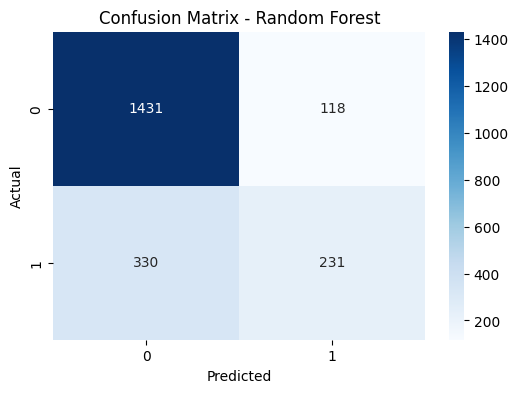

Evaluation for Gradient Boosting
Accuracy: 0.7876777251184834
Precision: 0.6275395033860045
Recall: 0.49554367201426025
F1-Score: 0.5537848605577689
ROC-AUC: 0.8298166029719595
--------------------------------------------------


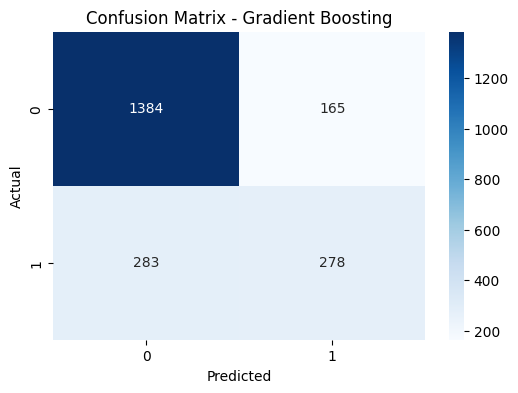

In [75]:
# Now evaluating all models
 
results = []
# Evaluate Logistic Regression
results.append(evaluate_model(log_model, X_test_scaled, y_test, "Logistic Regression"))
# Evaluate Decision Tree
results.append(evaluate_model(dt_model, X_test_scaled, y_test, "Decision Tree"))
# Evaluate Random Forest
results.append(evaluate_model(rf_model, X_test_scaled, y_test, "Random Forest"))
# Evaluate Gradient Boosting
results.append(evaluate_model(gb_model, X_test_scaled, y_test, "Gradient Boosting"))

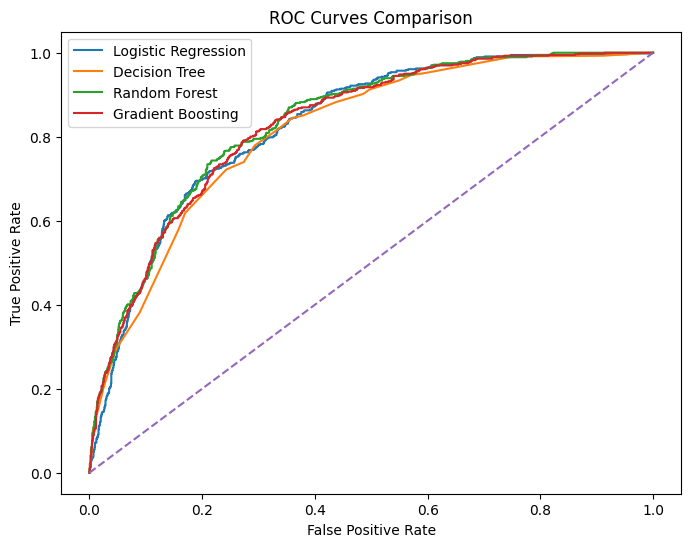

In [ ]:
# ROC Curve Comparison Plot
plt.figure(figsize=(8,6))
 
for r in results:
    fpr, tpr, _ = roc_curve(y_test, r["y_proba"])
    plt.plot(fpr, tpr, label=r["model"])
 
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

In [83]:
# Evaluate all models and compile results

df_results = pd.DataFrame(results)[["model", "accuracy", "precision", "recall", "f1", "roc_auc"]]
df_results

,model,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,0.789100,0.620332,0.532977,0.573346,0.827184
1,Decision Tree,0.772038,0.570922,0.573975,0.572444,0.813884
2,Random Forest,0.787678,0.661891,0.411765,0.507692,0.834091
3,Gradient Boosting,0.787678,0.627540,0.495544,0.553785,0.829817
